<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Prompt%20Engineering/Prompt_Engineering_Technique_Chain_Of_Thought.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Engineering Technique : Chain-Of-Thought**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- [What is Chain-of-thought](#1)
- Examples
  - [Enabling reasoning ability of LLM through Zero-shot Chain-of-thought](#2)
  - [Enabling reasoning ability of LLM through Few-shot Chain-of-thought](#3)
  - [Give model time to think](#4)
- Conclusion
  - [When to apply CoT](#5)
  - [Properties of CoT](#6)
  - [Why CoT fails in Small LM](#7)
  - [How to fine-tune small LM for CoT](#8)
  

<a name='1'></a>
# What is Chain-of-thought

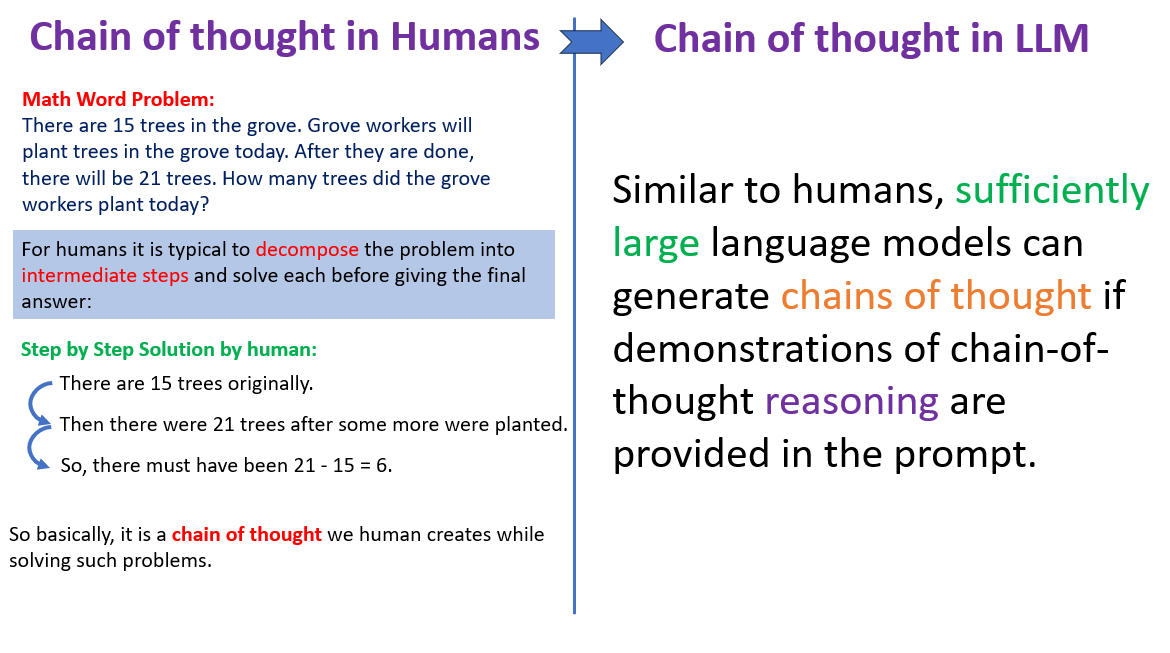

The success of large language models (LLMs) is often attributed to (in-context) zero, one  or few-shot learning. It can solve various tasks by simply conditioning the models on a few examples (few-shot) or instructions describing the task (zero-shot).

In our last lessons we learned prompt engineering techniques like Zero, One & Few-shot prompting. If you are new to Prompt Engineering , I recommend you watch these lessons before continuing this lesson.

In Few-shot prompt technique I demonstrated a use case where few-shot prompt was not good enough and we ended up switching to a bigger model to achieve the task in hand.

However, scaling up model size alone has not proved sufficient for achieving high performance on challenging tasks such as:
- arithmetic,
- commonsense, and
- symbolic reasoning

These tasks requires reasoning abilities.


## ✨ **How to enable such reasoning ability in Language Models ?**
In 2023,these **two papers** published by researchers at google demonstrated how the reasoning ability of large language models can be enabled. This process is called Chain-of-thought.

- First paper : [Large Language Models are Zero-Shot Reasoners](https://arxiv.org/pdf/2205.11916)
- Second Paper : [Chain-of-Thought Prompting Elicits Reasoning
in Large Language Models](https://arxiv.org/pdf/2201.11903)

First paper talks about how to enable resoning ability in Zero-Shot prompt and Second paper talks about enabling reasoning ability through few-shot.

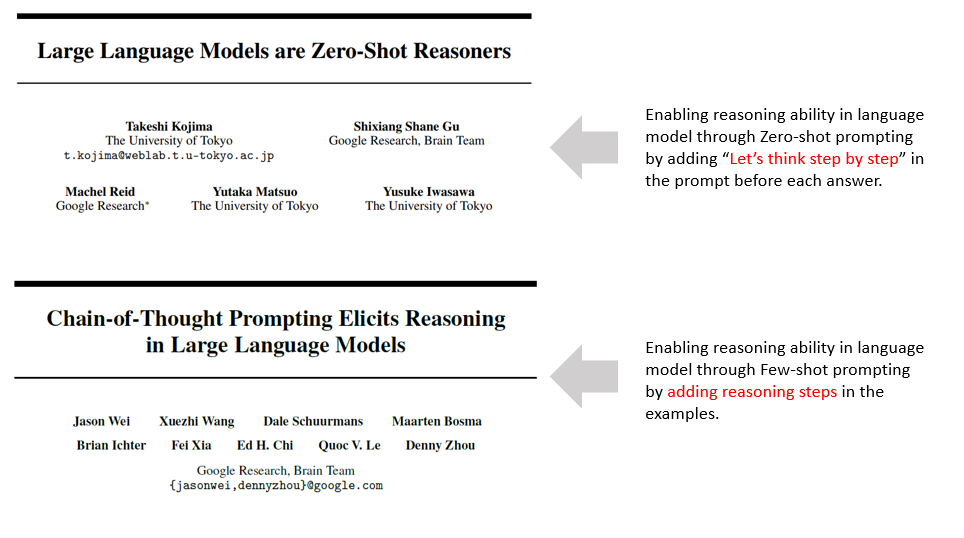

## Setup for OpenAI
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


# Libraries - OpenAI

In [ ]:
import openai

In [ ]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')
# Enter your OpenAI API key here:
client = openai.OpenAI(api_key = my_secret_key )

# Helper Function - OpenAI

In [ ]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-3.5-turbo" model and we are setting temperature=0
def get_response(messages):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

<a name='2'></a>
# Example 1 : Zero-Shot => Zero-Shot with CoT

- Task : Concatenate the last letters of words 'Amy Brown'
- Task type : This task falls under **Symbolic Reasoing**

This means that we need to enable the **reasoning ability** of the LLM.

For demostration :
- First we shall try Zero-shot without CoT.
- Then we shall move to Zero-Shot with CoT


### Zero-Shot

In [ ]:
messages = []
messages.append({"role": "user", "content": "concatenate the last letters of words 'Amy Brown'."})
response = get_response(messages)
print(response)


nwdn


### Zero-Shot with Chain-of-thought(COT)

In [ ]:
messages = []
messages.append({"role": "user", "content": "Concatenate the last letters of words 'Amy Brown'.Let’s think step by step."})
response = get_response(messages)
print(response)

The last letter of "Amy" is "y" and the last letter of "Brown" is "n". 

Therefore, when we concatenate the last letters of the words "Amy Brown", we get "yn".


<a name='3'></a>
# Example 2 : Zero-Shot => Few-Shot => Zero-Shot with CoT => Few-Shot with CoT

Task : Reverse this word 'lollipop'

In this example, we shall see an example where reasoning ability is needed to solve the problem.
- We shall first see that Zero-shot & Few-Shot alone cant solve this problem.
- Then we shall move to Zero-Shot with CoT
- If response is still not correct, then we shall move to Few-Shot with CoT


### First lets try with Zero-Shot

In [ ]:
messages = []
messages.append({"role": "user", "content": "reverse this word 'lollipop'."})
response = get_response(messages)
print(response)

pilpolol


### Now try with Few-Shot

In [ ]:
system_prompt="""
Your task is to reverse the word.

Example1:
Reverse this word "tiptop"

Reversed word:
potpit

Example2:
Reverse this word "kingkong"

Reversed word:
gnokgnik

Example3:
Reverse this word "kitkat"

Reversed word:
taktik
"""

user_prompt="""
Reverse this word "lollipop"

Reversed word:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": system_prompt})
messages.append({"role": "user", "content": user_prompt})
response = get_response(messages)
print(response)

poppilol


### Lets enable the reasoning ability in Zero-Shot through Chain-of-thought

In [ ]:
messages = []
messages.append({"role": "user", "content": "reverse this word 'lollipop'.Lets think step by step "})
response = get_response(messages)
print(response)

1. Reverse the word "lollipop" letter by letter: "polpilol"
2. Reverse the order of the letters: "lolpiplop"


### Finally, let's enable the reasoning ability in Few-Shot by adding  Chain-of-thought

In [ ]:
system_prompt="""
Your task is to reverse the word.
Lets think step by step as shown in below examples.

Example1:
Reverse this word "tiptop"

total number of characters in the string = 6
their index positions are:
t=0,i=1,p=2,t=3,o=4,p=5
Putting them in the recerse index position we get:potpit

Example2:
Reverse this word "kingkong"

total number of characters in the string = 7
their index positions are:
k=0,i=1,n=2,g=3,k=4,o=5,n=6,g=7
Putting them in the recerse index position we get:gnokgnik

Example3:
Reverse this word "kitkat"

total number of characters in the string = 6
their index positions are:
k=0,i=1,t=2,k=3,a=4,t=5
Putting them in the recerse index position we get:taktik
"""

user_prompt="""
Reverse this word "lollipop"

Reversed word:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": system_prompt})
messages.append({"role": "user", "content": user_prompt})
response = get_response(messages)
print(response)

total number of characters in the string = 8
their index positions are:
l=0,o=1,l=2,l=3,i=4,p=5,o=6,p=7
Putting them in the reverse index position we get:popillol


<a name='4'></a>
# 🎯Strategy: Give models **time🕓** to **"think"**

If asked to multiply 17 by 28, you might not know it instantly, but can still work it out with time. Similarly, models make more reasoning errors when trying to answer right away, rather than taking time to work out an answer. Asking for a "chain of thought" before an answer can help the model reason its way toward correct answers more reliably.

✨ **Tactics:**

Sometimes we get better results when we explicitly instruct the model to reason from first principles before coming to a conclusion. Suppose for example we want a model to evaluate a student’s solution to a math problem. The most obvious way to approach this is to simply ask the model if the student's solution is correct or not.

In [ ]:
system_prompt="""
Determine if the student's solution is correct or not.
"""
user_prompt="""
Problem Statement: I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.

Student's Solution: Let x be the size of the installation in square feet.
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)


The student's solution is correct. The total cost for the first year of operations as a function of the number of square feet is indeed 450x + 100,000.


❌ But the student's solution is actually not correct!

✅ We can get the model to successfully notice this by prompting the model to generate its own solution first.

In [ ]:
system_prompt="""
First work out your own solution to the problem. Then compare your solution to the student's solution and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until you have done the problem yourself.
"""
user_prompt="""
Problem Statement: I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.

Student's Solution: Let x be the size of the installation in square feet.
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Let's work out the total cost for the first year of operations as a function of the number of square feet.

1. Land cost: $100 / square foot * x square feet = $100x
2. Solar panel cost: $250 / square foot * x square feet = $250x
3. Maintenance cost: $100,000 + $10 / square foot * x square feet = $100,000 + $10x

Total cost: $100x + $250x + $100,000 + $10x = $360x + $100,000

Therefore, the correct total cost for the first year of operations as a function of the number of square feet is $360x + $100,000.

Now, let's compare the student's solution to the correct solution:

Student's Total Cost: 450x + 100,000
Correct Total Cost: 360x + 100,000

The student's solution is incorrect.


# Conclusion

<a name='5'></a>
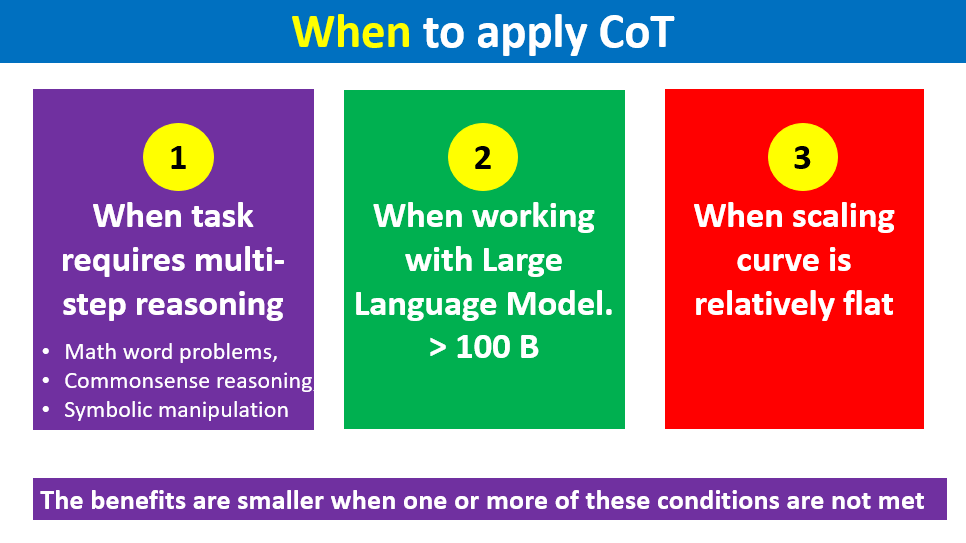

How to decide if we should apply a Chain-of-Thought for the given problem ?

Chain-of-thought prompting can potentially be applied to any task for which humans use a “chain of thought” to solve the problem.

But still there these three considerations one should have before applying chain-of-thought to their problem.

With various research and experiments it is concluded that Chain of thought helps the most when three conditions are met

- the task is challenging and requires multi-step reasoning,
- a large language model is used, and
- the scaling curve is relatively flat. : It means that chain of thought reasoning helps the most in scenarios where simply making the model larger does not lead to proportional improvements in performance. In these cases, the model's ability to engage in multi-step reasoning or to "think" through a problem step-by-step becomes more valuable for tackling challenging tasks

**Conversely, the benefits are smaller when one or more of these conditions are not met**

<a name='6'></a>
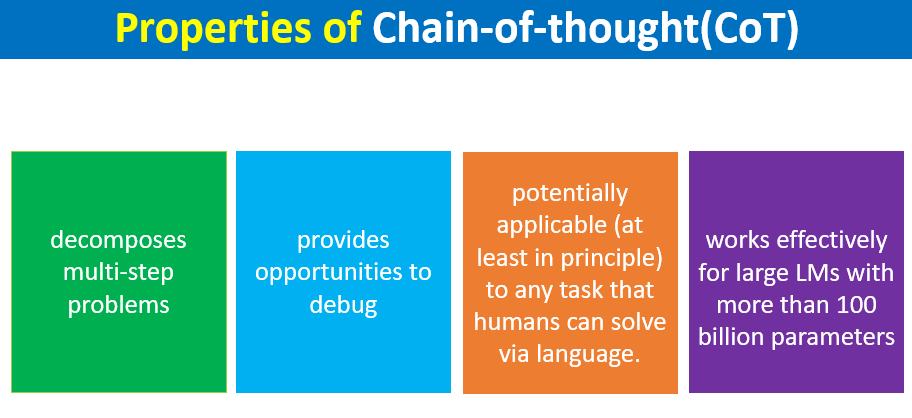

Chain-of-thought prompting has several attractive properties as an approach for facilitating reasoning in language models.

**First,** chain of thought, in principle, allows models to decompose multi-step problems into intermediate steps, which means that additional computation can be allocated to problems that require more reasoning steps.

**Second,** a chain of thought provides an interpretable window into the behavior of the model, suggesting how it might have arrived at a particular answer and providing opportunities to debug where the reasoning path went wrong (although fully characterizing a model’s computations that support an answer remains an open question).

**Third,** chain-of-thought reasoning can be used for tasks such as math word problems, commonsense reasoning, and symbolic manipulation, and is potentially applicable (at least in principle) to any task that humans can solve via language.

Finally, chain-of-thought reasoning can be readily prompted in sufficiently large off-the-shelf language models simply by including examples of chain of thought sequences into the exemplars of few-shot prompting.
      
The finding that successful chain-of-thought reasoning predictably emerges only at certain model scales is interesting and also strange.


<a name='7'></a>
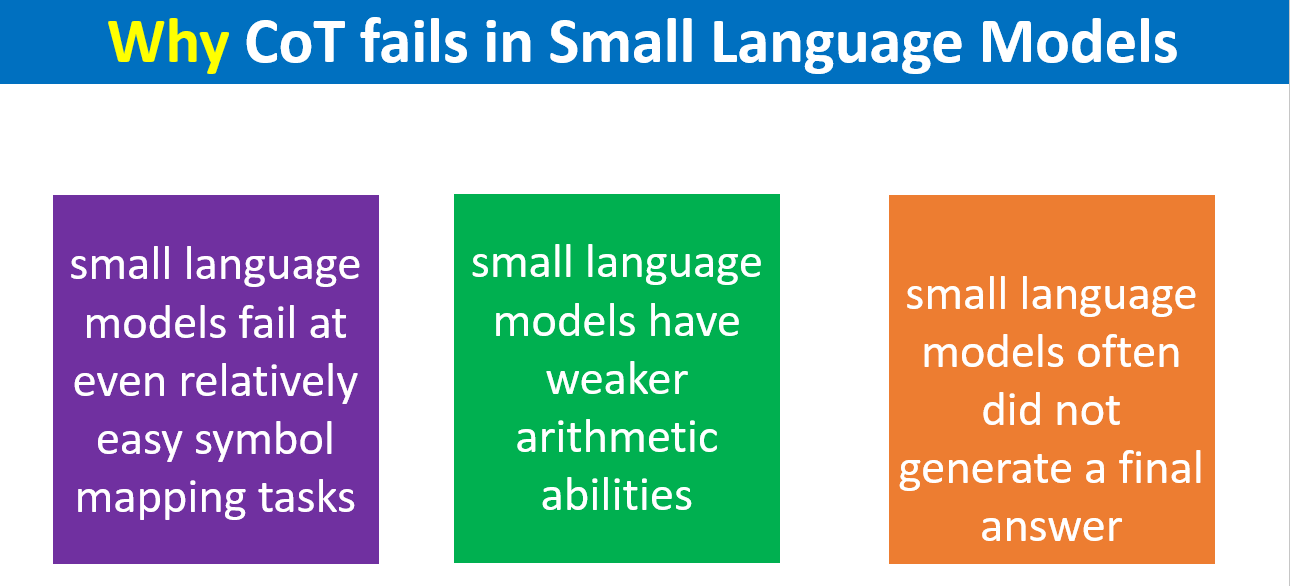

There are also three notable points regarding why small language models fail.

The first observation is that : small language models fail at even relatively easy symbol mapping tasks.

The second observation is that small language models seem to have inherently weaker arithmetic abilities, the ability to do simple arithmetic operations (without semantic understanding) requires sufficient model scale.

Finally, small language models often did not generate a final answer that could be construed, due to either repetitions or logic that never arrived at a final answer.

In summary, the success of chain-of-thought reasoning as a result of model scale is a complicated phenomena that likely involves a variety of emergent abilities (semantic understanding, symbol mapping, staying on topic, arithmetic ability, faithfulness, etc). Future work could more thoroughly investigate what properties of pretraining data, model architecture, and optimization objective causally enable such reasoning capabilities.


<a name='8'></a>
### How to fine-tune small LM for CoT

This paper talks about fine-tuning small language models to add reasoning capability so that we can apply chain-of-thought after fini-tuning on small language models.

[The COT COLLECTION: Improving Zero-shot and Few-shot Learning of
Language Models via Chain-of-Thought Fine-Tuning](https://arxiv.org/pdf/2305.14045)

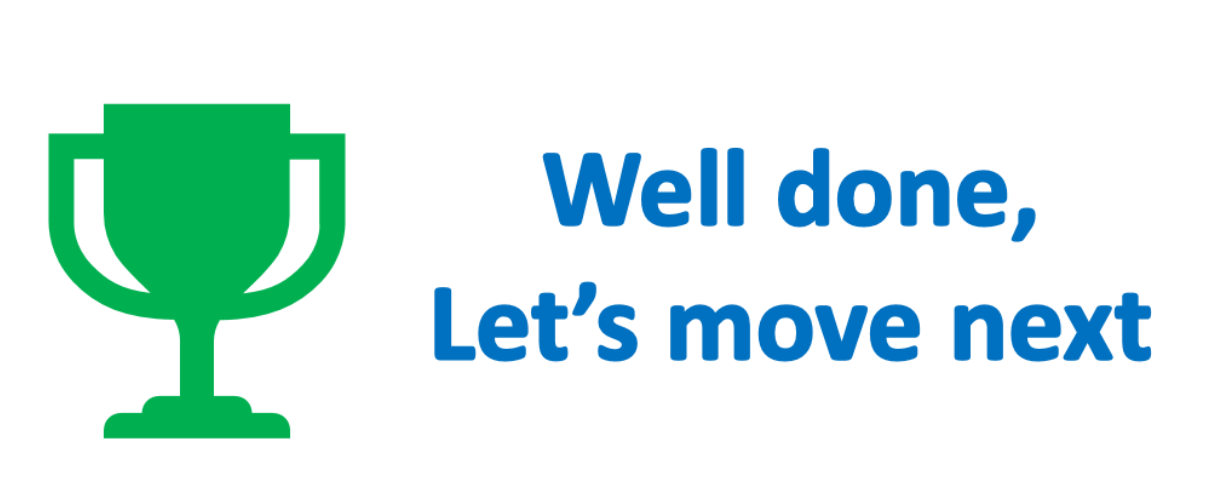